In [5]:
import numpy as np
import NegotiationTools as negtools
import matplotlib.pyplot as plt
from skimage.draw import rectangle
import skimage as skim
import pandas as pd
import seaborn as sb
import Experiments as exp

stats = negtools.StatisticsLogger()
nt = negtools.NegTools()

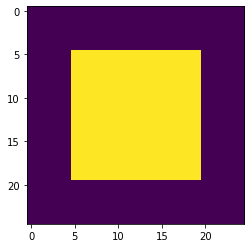

In [123]:
# Binary Checkerboard Example
H = 25
W = 25
templates = dict()
templates['blob'] = np.zeros((W, H), dtype=np.uint8)
templates['blob'][tuple(rectangle(start=(5,5), extent=(15,15), shape=(W,H)))] = 1

templates['blobs'] = np.zeros((W, H), dtype=np.uint8)
templates['blobs'][1:H//2-1,1:W//2-1] = 1
templates['blobs'][1:H//2-1,W//2+2:W-1] = 2
templates['blobs'][H//2+1:H-1,1:W//2-1] = 3
templates['blobs'][H//2+1:H-1,W//2+2:W-1] = 4
templates['checkerboard'] = skim.data.checkerboard().astype(np.bool).astype(np.float32)

In [140]:
def agent_binary_balanced(mu, std):
    samp_mu = np.random.normal(loc=mu, scale=std)

    mat = [[samp_mu, 1.-samp_mu],
           [1.-samp_mu, samp_mu]]
    return np.asarray(mat)

def agent_binary_unbalanced(mu_1, mu_2, std):
    samp_mu_1 = np.random.normal(loc=mu_1, scale=std)
    samp_mu_2 = np.random.normal(loc=mu_2, scale=std)

    mat = [[samp_mu_1, 1.-samp_mu_1],
           [1.-samp_mu_2, samp_mu_2]]
    return np.asarray(mat)

def agent_expert(mu_star, mu, std, c_star, n_labels):
    '''
    :param mu_star - "competence" on expertise class
    :param mu - "competence" on non expertise classes
    :param std - standard deviation
    :param c_star - index of expertise class
    :param n_labels - number of labels
    '''
    samp_mu = np.random.normal(loc=mu, scale=std)
    samp_mu_star = np.random.normal(loc=mu_star, scale=std)
    samp_c_star_others = (1. - samp_mu_star)/(n_labels - 1.)
    samp_gamma = (1. - samp_c_star_others - samp_mu) / (n_labels-2.) if n_labels > 2 else 0

    mat = list()
    for t in range(n_labels):
        row = list()
        for p in range(n_labels):
            if p == c_star and t == c_star:
                row.append(samp_mu_star)
            elif t == c_star or p == c_star:
                row.append(samp_c_star_others)
            elif p == t:
                row.append(samp_mu)
            else:
                row.append(samp_gamma)
        mat.append(row)
    return np.asarray(mat)

def generate_predictions(gt_template, agent_matrix):
    prediction = list()
    # Iterating through the columns (predicted classes) of agent matrix, filling the corresponding ground_truth areas with predictions
    for pred_label in range(agent_matrix.shape[-1]):
        label_image = np.zeros_like(gt_template)
        for true_label in np.unique(gt_template):
            label_image = np.where(gt_template == true_label, agent_matrix[true_label, pred_label], label_image)
        prediction.append(label_image)
    return np.stack(prediction, axis=-1)

def generate_ground_truth(gt_template, n_labels):
    gt = list()
    for l in range(n_labels):
        gt_slice = np.where(gt_template==l, 1.0, 0.0)
        gt.append(gt_slice)
    return np.stack(gt, axis=-1)

## Balanced (Binary)

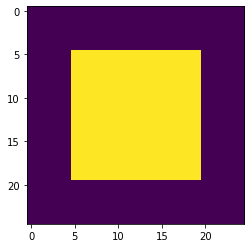

In [141]:
plt.imshow(templates['blob'])

In [151]:
N_LABELS = 2
N_AGENTS = 3

mu = 0.6
std = 0.01
c_star = 0
template = templates['blob']

# Generating agents
agents = [agent_binary_balanced(mu=mu, std=std) for a in range(N_AGENTS)]
# Generating ground truth and predictions
gt = generate_ground_truth(template, N_LABELS)
predictions = np.stack([generate_predictions(template, agent_matrix) for agent_matrix in agents])

In [152]:
exp.run_experiment_on_list([predictions], [gt])

Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0


,Label 0_f1-score,Label 0_precision,Label 0_recall,Label 0_support,Label 1_f1-score,Label 1_precision,Label 1_recall,Label 1_support,accuracy,macro avg_f1-score,macro avg_precision,macro avg_recall,macro avg_support,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support,method
0,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Majority Voting
1,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Maximum Proposal
2,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Mean Proposal
3,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Negotiation - 3x3 Conv Entropy
4,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Negotiation - 5x5 Conv Entropy
5,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Negotiation - Mean Entropy
6,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Negotiation - Pixelwise Entropy
7,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Weighted Mean - 3x3 Conv Entropy
8,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Weighted Mean - 5x5 Conv Entropy
9,1.0,1.0,1.0,400.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,625.0,1.0,1.0,1.0,625.0,Weighted Mean - Mean Entropy


## Unbalanced on C1 (Binary)

In [155]:
N_LABELS = 2
N_AGENTS = 3

mu_1 = 0.6
mu_2 = 0.4
std = 0.01
c_star = 0
template = templates['blob']

# Generating agents
agents = [agent_binary_unbalanced(mu_1=mu_1, mu_2=mu_2, std=std) for a in range(N_AGENTS)]
# Generating ground truth and predictions
gt = generate_ground_truth(template, N_LABELS)
predictions = np.stack([generate_predictions(template, agent_matrix) for agent_matrix in agents])

In [156]:
exp.run_experiment_on_list([predictions], [gt])

Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0


,Label 0_f1-score,Label 0_precision,Label 0_recall,Label 0_support,Label 1_f1-score,Label 1_precision,Label 1_recall,Label 1_support,accuracy,macro avg_f1-score,macro avg_precision,macro avg_recall,macro avg_support,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support,method
0,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Majority Voting
1,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Maximum Proposal
2,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Mean Proposal
3,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Negotiation - 3x3 Conv Entropy
4,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Negotiation - 5x5 Conv Entropy
5,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Negotiation - Mean Entropy
6,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Negotiation - Pixelwise Entropy
7,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Weighted Mean - 3x3 Conv Entropy
8,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Weighted Mean - 5x5 Conv Entropy
9,0.780488,0.64,1.0,400.0,0.0,0.0,0.0,225.0,0.64,0.390244,0.32,0.5,625.0,0.499512,0.4096,0.64,625.0,Weighted Mean - Mean Entropy


## Unbalanced on C2 (Binary)

In [158]:
N_LABELS = 2
N_AGENTS = 3

mu_1 = 0.4
mu_2 = 0.6
std = 0.01
c_star = 0
template = templates['blob']

# Generating agents
agents = [agent_binary_unbalanced(mu_1=mu_1, mu_2=mu_2, std=std) for a in range(N_AGENTS)]
# Generating ground truth and predictions
gt = generate_ground_truth(template, N_LABELS)
predictions = np.stack([generate_predictions(template, agent_matrix) for agent_matrix in agents])

In [159]:
exp.run_experiment_on_list([predictions], [gt])

Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0


,Label 0_f1-score,Label 0_precision,Label 0_recall,Label 0_support,Label 1_f1-score,Label 1_precision,Label 1_recall,Label 1_support,accuracy,macro avg_f1-score,macro avg_precision,macro avg_recall,macro avg_support,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support,method
0,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Majority Voting
1,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Maximum Proposal
2,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Mean Proposal
3,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Negotiation - 3x3 Conv Entropy
4,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Negotiation - 5x5 Conv Entropy
5,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Negotiation - Mean Entropy
6,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Negotiation - Pixelwise Entropy
7,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Weighted Mean - 3x3 Conv Entropy
8,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Weighted Mean - 5x5 Conv Entropy
9,0.0,0.0,0.0,400.0,0.529412,0.36,1.0,225.0,0.36,0.264706,0.18,0.5,625.0,0.190588,0.1296,0.36,625.0,Weighted Mean - Mean Entropy


## Expert C* (Multiclass)

In [117]:
N_LABELS = 5
N_AGENTS = 3

mu_star = 1.5/N_LABELS
mu = 1/N_LABELS
std = 0.01
c_star = 0
template = templates['blobs']

# Generating agents
agents = [agent_expert(mu_star=mu_star, mu=mu, std=std, c_star=c_star, n_labels=N_LABELS) for a in range(N_AGENTS)]
# Generating ground truth and predictions
gt = generate_ground_truth(template, N_LABELS)
predictions = np.stack([generate_predictions(template, agent_matrix) for agent_matrix in agents])


In [119]:
predictions.shape

(3, 25, 25, 5)

In [120]:
exp.run_experiment_on_list([predictions], [gt])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0
Sample 0 Consensus Reached at step, current step: 0


,Label 0_f1-score,Label 0_precision,Label 0_recall,Label 0_support,Label 1_f1-score,Label 1_precision,Label 1_recall,Label 1_support,Label 2_f1-score,Label 2_precision,...,accuracy,macro avg_f1-score,macro avg_precision,macro avg_recall,macro avg_support,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support,method
0,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Majority Voting
1,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Maximum Proposal
2,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Mean Proposal
3,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Negotiation - 3x3 Conv Entropy
4,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Negotiation - 5x5 Conv Entropy
5,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Negotiation - Mean Entropy
6,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Negotiation - Pixelwise Entropy
7,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Weighted Mean - 3x3 Conv Entropy
8,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Weighted Mean - 5x5 Conv Entropy
9,1.0,1.0,1.0,205.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.328,0.2,0.2,0.2,625.0,0.328,0.328,0.328,625.0,Weighted Mean - Mean Entropy


In [87]:
predictions.sum(axis=-1).max()

2.272912602905122